Michael's latest paper suggests that 500 $\mathrm{\mu m}$ sources are extreme SBs. However, he assumes that all the 500 $\mathrm{\mu m}$ is associated with one source. Not sure that is correct...

In [2]:
RA=162.46065
Dec=58.11701
radius=1/60.0


In [3]:
from astropy.io import fits
hdulist_250=fits.open('/Users/pdh21/astrodata/Lockman-SWIRE/L5-Lockman-SWIRE_image_SMAP250_DR2.fits')
hdulist_350=fits.open('/Users/pdh21/astrodata/Lockman-SWIRE/L5-Lockman-SWIRE_image_SMAP350_DR2.fits')
hdulist_500=fits.open('/Users/pdh21/astrodata/Lockman-SWIRE/L5-Lockman-SWIRE_image_SMAP500_DR2.fits')

In [4]:
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.simplefilter('ignore', MatplotlibDeprecationWarning)
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore',UnicodeWarning)

In [5]:
#Set some color info
import seaborn as sns
import pylab as plt
%matplotlib inline
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
vmin=-0.01
vmax=0.1

In [6]:
from astropy.table import Table, hstack
xid24=Table.read('/Users/pdh21/astrodata/Lockman-SWIRE/WP5-Lockman-SWIRE-xID24-v1.0.fits.gz')
scat250=Table.read('/Users/pdh21/HELP/Extreme_submm_SB_gals/L5-Lockman-SWIRE/L5-Lockman-SWIRE_SCAT250SXT_DR2.fits.gz')
scat350=Table.read('/Users/pdh21/HELP/Extreme_submm_SB_gals/L5-Lockman-SWIRE/L5-Lockman-SWIRE_SCAT350SXT_DR2.fits.gz')
scat500=Table.read('/Users/pdh21/HELP/Extreme_submm_SB_gals/L5-Lockman-SWIRE/L5-Lockman-SWIRE_SCAT500SXT_DR2.fits.gz')


In [11]:
MRR=Table.read('/Users/pdh21/HELP/Extreme_submm_SB_gals/lockxmms1cdfsn1catesubm.fits')
txt='nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,err36,err45,err58,err8,err24,am1,am2,am3,am4,am5,em1,em2,em3,em4,em5,am21,am22,am23,am25,am26,em21,em22,em23,em25,em26,am6,am7,am8,em6,em7,em8,m1,m2,m3,m4,m5,mst,j1,alz,err0,n91,j2,alz2,av1,err1,alb,spectz0,nflk1,nir,alp1,alp2,alp3,alp4,alp5,alp6,errir3,alcirr,alsb,alagn,ala220,alysb,alosb,alir,nirtem,als70,als160,als350,als450,als850,als1250,ra1,dec1,s250,err250,s350,err350,s500,err500,dist1,dist2,al36,alm,sfr,almd,zf,zcomb,alir9,ntyp,chi'
for i in range(0,len(MRR.colnames)):
    MRR[MRR.colnames[i]].name=txt.split(',')[i]
MRR.write('MRR_lockxmms1cdfsn1catesubm.fits')

In [7]:
xid24

xID24_ID,RA,Dec,F_MIPS_24,FErr_MIPS_24,F_SPIRE_250,FErr_SPIRE_250,FErrTot_SPIRE_250,Chi2_SPIRE_250,F_SPIRE_350,FErr_SPIRE_350,FErrTot_SPIRE_350,Chi2_SPIRE_350,F_SPIRE_500,FErr_SPIRE_500,FErrTot_SPIRE_500,Chi2_SPIRE_500,index_spitzer,gID,gSize,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500
,deg,deg,uJy,uJy,mJy,mJy,mJy,,mJy,mJy,mJy,,mJy,mJy,mJy,,,,,mJy/Beam,mJy/Beam,mJy/Beam
str50,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str100,int32,int32,float64,float64,float64
HerMES-xID24-302690,157.885318,57.793718,231.26,13.89,4.2406306,0.60973954,6.0657015,3.1331046,3.8504803,0.6550535,6.0200496,5.2521863,5.9833813,0.7202375,6.2166586,7.7964964,619705,181698,3,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302691,157.893388,57.776968,495.24,15.46,5.1345696,0.57651675,6.0620084,2.9956589,9.226455,0.8655568,6.029236,5.43262,9.430833,0.6699519,6.2035007,7.9821973,619453,180480,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302692,157.895148,57.819108,210.49,14.85,4.2313604,0.5947147,6.0613084,3.4422586,6.0626884,0.60219103,6.0138865,5.615175,8.033914,0.6592564,6.196878,6.1597667,620270,184922,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302693,157.897408,57.791878,450.92,15.58,5.4379506,0.798909,6.078466,2.043709,4.1345587,0.62400246,6.015002,3.907249,5.022814,0.9073341,6.232277,5.181458,619768,181698,3,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302694,157.907547,57.845058,204.57,15.82,4.7356744,0.6159273,6.067737,3.1597278,6.0880857,0.5886564,6.0087414,4.567341,9.006512,0.66069174,6.2090898,5.9918795,621016,186777,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302695,157.914937,57.838698,218.34,15.22,4.8221145,0.63369954,6.069407,2.115149,6.0097904,0.6060749,6.0147977,3.510213,7.360785,0.6100244,6.1992908,4.4073153,620929,187093,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302696,157.919208,57.712788,279.44,16.67,6.694285,0.68632466,6.0508504,3.4474454,8.279532,0.63717496,6.0119076,5.9944797,7.4012,0.5155375,6.1917443,6.973388,463098,174126,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302697,157.919377,57.894338,1058.23,16.06,4.892702,0.5222408,6.066267,3.004969,6.708245,0.63620085,6.013464,5.2200303,7.2231283,0.6140477,6.197945,6.462931,622539,191798,1,-2.3633409,-3.4109612,-3.8947144


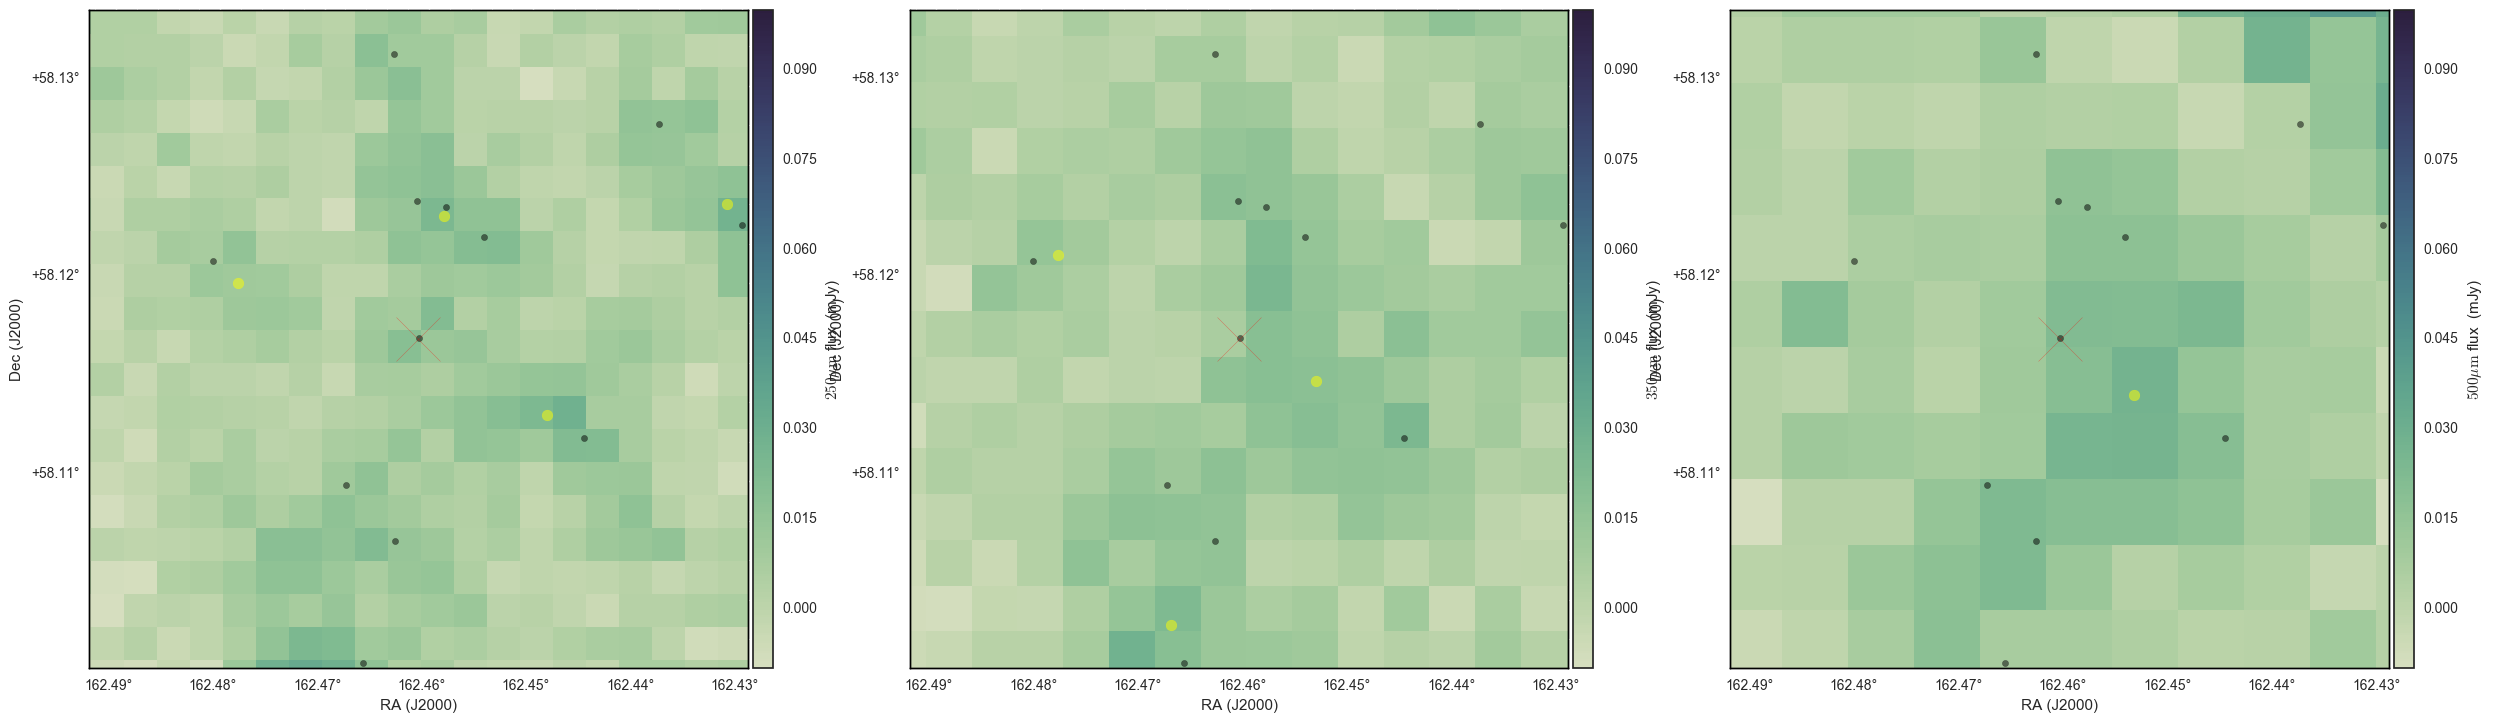

In [10]:
import aplpy
sns.set_style("white")

fig = plt.figure(figsize=(30,10))
real_250 = aplpy.FITSFigure(hdulist_250[1],figure=fig,subplot=(1,3,1))
real_250.show_colorscale(vmin=vmin,vmax=vmax,cmap=cmap)
real_250.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=20, alpha=0.5)
real_250.tick_labels.set_xformat('dd.dd')
real_250.tick_labels.set_yformat('dd.dd')
real_250.show_markers(RA,Dec, edgecolor='red', facecolor='red',
    marker='x', s=1000, alpha=0.5)
real_250.show_markers(scat250['RA'],scat250['Dec'], edgecolor='yellow', facecolor='yellow',
    marker='o', s=60, alpha=0.5)

real_350 = aplpy.FITSFigure(hdulist_350[1],figure=fig,subplot=(1,3,2))
real_350.show_colorscale(vmin=vmin,vmax=vmax,cmap=cmap)
real_350.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=20, alpha=0.5)
real_350.show_markers(RA,Dec, edgecolor='red', facecolor='red',
    marker='x', s=1000, alpha=0.5)
real_350.show_markers(scat350['RA'],scat350['Dec'], edgecolor='yellow', facecolor='yellow',
    marker='o', s=60, alpha=0.5)


real_350.tick_labels.set_xformat('dd.dd')
real_350.tick_labels.set_yformat('dd.dd')
real_500 = aplpy.FITSFigure(hdulist_500[1],figure=fig,subplot=(1,3,3))
real_500.show_colorscale(vmin=vmin,vmax=vmax,cmap=cmap)
real_500.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=20, alpha=0.5)
real_500.show_markers(RA,Dec, edgecolor='red', facecolor='red',
    marker='x', s=1000, alpha=0.5)
real_500.show_markers(scat500['RA'],scat500['Dec'], edgecolor='yellow', facecolor='yellow',
    marker='o', s=60, alpha=0.5)


real_500.tick_labels.set_xformat('dd.dd')
real_500.tick_labels.set_yformat('dd.dd')
real_250.add_colorbar(axis_label_text=r'$250\mathrm{\mu m}$ flux  (mJy)')  
real_350.add_colorbar(axis_label_text=r'$350\mathrm{\mu m}$ flux  (mJy)')  
real_500.add_colorbar(axis_label_text=r'$500\mathrm{\mu m}$ flux  (mJy)')  
real_250.recenter(RA, Dec, radius=radius)
real_350.recenter(RA, Dec, radius=radius)
real_500.recenter(RA, Dec, radius=radius)




In [18]:
def MRR_sample(ra,dec,radius):
    SPIRE=[]
    fig = plt.figure(figsize=(30,10))
    SPIRE.append(aplpy.FITSFigure(hdulist_250[1],figure=fig,subplot=(1,3,1)))
    SPIRE.append(aplpy.FITSFigure(hdulist_350[1],figure=fig,subplot=(1,3,2)))
    SPIRE.append(aplpy.FITSFigure(hdulist_500[1],figure=fig,subplot=(1,3,3)))
    for i in SPIRE:
        i.show_colorscale(vmin=-0.01,vmax=0.1,cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True))
        i.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=40, alpha=0.5)
        i.show_markers(ra,dec, edgecolor='black', facecolor='black',
                marker='x', s=1000, alpha=1.0)
        i.show_markers(scat250['RA'],scat250['Dec'], edgecolor='blue', facecolor='blue',
    marker='o', s=80, alpha=0.5)
        i.show_markers(scat350['RA'],scat350['Dec'], edgecolor='green', facecolor='green',
    marker='o', s=80, alpha=0.5)
        i.show_markers(scat500['RA'],scat500['Dec'], edgecolor='red', facecolor='red',
    marker='o', s=80, alpha=0.5)
        i.recenter(ra, dec, radius=radius)
        i.add_colorbar()
        i.colorbar.set_location('top')
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(ra=[ra]*u.degree, dec=[dec]*u.degree)  
    
    catalog = SkyCoord(ra=xid24['RA'], dec=xid24['Dec'])  
    idx24, d2d, d3d = c.match_to_catalog_sky(catalog) 
    catalog = SkyCoord(ra=scat250['RA'], dec=scat250['Dec'])  
    idx250, d2d, d3d = c.match_to_catalog_sky(catalog) 
    catalog = SkyCoord(ra=scat350['RA'], dec=scat350['Dec'])  
    idx350, d2d, d3d = c.match_to_catalog_sky(catalog) 
    catalog = SkyCoord(ra=scat500['RA'], dec=scat500['Dec'])  
    idx500, d2d, d3d = c.match_to_catalog_sky(catalog) 
    
    print [xid24['F_MIPS_24'][idx24]._data,scat250['F_SPIRE_250'][idx250]._data,scat350['F_SPIRE_350'][idx350]._data,scat500['F_SPIRE_500'][idx500]._data]
    print scat250[idx250]
    catalog = SkyCoord(ra=MRR['ra']*u.degree, dec=MRR['dec']*u.degree)  
    idx, d2d, d3d = c.match_to_catalog_sky(catalog) 
    #print MRR[idx]

This is disturbing. In Table 6 in Michael's paper, the fluxes are listed as follows:

| RA    | dec  | i    | S24  | S250 | S350 | S500 | zphot | type  | $\chi^2$ | nbands | zsubm | zcomb | sfr  |
| ----- | ---- | ---- | ---- | ---- | ---- | ---- | ----- | ----- | -------- | ------ | ----- | ----- | ---- |
| 162.46065 | 58.11701 | 21.96 | 252.5 | - | 28.4 | 41.4 | 4.06 | sb (QSO?) | 7.9 | 6 | 4.81 | 4.13 | 3.88 |


In [11]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=[RA]*u.degree, dec=[Dec]*u.degree)  
catalog = SkyCoord(ra=scat250['RA'], dec=scat250['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 

In [12]:
catalog = SkyCoord(ra=xid24['RA'], dec=xid24['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 
print d2d
xid24[idx]
#xid24[xid24['xID24_ID']=='HerMES-xID24-356492']

[u'0d00m00.2216s']


xID24_ID,RA,Dec,F_MIPS_24,FErr_MIPS_24,F_SPIRE_250,FErr_SPIRE_250,FErrTot_SPIRE_250,Chi2_SPIRE_250,F_SPIRE_350,FErr_SPIRE_350,FErrTot_SPIRE_350,Chi2_SPIRE_350,F_SPIRE_500,FErr_SPIRE_500,FErrTot_SPIRE_500,Chi2_SPIRE_500,index_spitzer,gID,gSize,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500
,deg,deg,uJy,uJy,mJy,mJy,mJy,,mJy,mJy,mJy,,mJy,mJy,mJy,,,,,mJy/Beam,mJy/Beam,mJy/Beam
str50,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str100,int32,int32,float64,float64,float64
HerMES-xID24-356492,162.460577,58.117058,252.51,16.54,24.07481,4.0760155,6.132857,1.1339351,25.765917,5.025572,6.486367,0.8432113,1.9725392,7.500232,8.343756,0.639557,402926,203513,129,-2.3633409,-3.4109612,-3.8947144


In [13]:
catalog = SkyCoord(ra=scat250['RA'], dec=scat250['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 
print d2d
scat250[idx]

[u'0d00m22.8641s']


IAU_name,RA,Dec,Flux,e_Flux,Quality,e_RA,e_Dec,et_Flux,SNR,Flux_halfdata1,Quality_halfdata1,Flux_halfdata2,Quality_halfdata2,Central_Region
,deg,deg,mJy,mJy,,deg,deg,mJy,,mJy,,mJy,,
str50,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
2HERMES S250 SX J104950.0+580723,162.458370985,58.1232460432,30.1297241365,2.02731044028,93.5926333967,0.000385380300514,0.000203521782382,6.51175455709,4.62697478419,29.4706853226,31.8852483123,30.6285032312,43.6599460981,True


In [14]:
catalog = SkyCoord(ra=scat350['RA'], dec=scat350['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 
print d2d
scat350[idx]

[u'0d00m16.0029s']


IAU_name,RA,Dec,Flux,e_Flux,Quality,e_RA,e_Dec,et_Flux,SNR,Flux_halfdata1,Quality_halfdata1,Flux_halfdata2,Quality_halfdata2,Central_Region
,deg,deg,mJy,mJy,,deg,deg,mJy,,mJy,,mJy,,
str50,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
2HERMES S350 SX J104948.7+580653,162.453209094,58.1149331947,31.707874279,1.93982895771,116.701256798,0.000485424308607,0.000256415440163,8.22309396614,3.8559542685,30.2113276327,42.7474141204,33.1549773919,57.6810657743,True


In [15]:
catalog = SkyCoord(ra=scat500['RA'], dec=scat500['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 
print d2d
scat500[idx]

[u'0d00m16.9018s']


IAU_name,RA,Dec,Flux,e_Flux,Quality,e_RA,e_Dec,et_Flux,SNR,Flux_halfdata1,Quality_halfdata1,Flux_halfdata2,Quality_halfdata2,Central_Region
,deg,deg,mJy,mJy,,deg,deg,mJy,,mJy,,mJy,,
str50,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
2HERMES S500 SX J104948.8+580650,162.453488341,58.1142292549,38.6379253549,2.42843682474,109.908696528,0.000719777434739,0.000380215216978,7.92159625665,4.8775428718,35.0812066771,38.291268179,42.1388542053,60.7269675757,True


In [16]:
catalog = SkyCoord(ra=MRR['ra']*u.degree, dec=MRR['dec']*u.degree)  
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 
print d2d
MRR[idx]

[u'0d00m00s']


nidir,nidopt,ra,dec,s36,s45,s58,s8,s24,err36,err45,err58,err8,err24,am1,am2,am3,am4,am5,em1,em2,em3,em4,em5,am21,am22,am23,am25,am26,em21,em22,em23,em25,em26,am6,am7,am8,em6,em7,em8,m1,m2,m3,m4,m5,mst,j1,alz,err0,n91,j2,alz2,av1,err1,alb,spectz0,nflk1,nir,alp1,alp2,alp3,alp4,alp5,alp6,errir3,alcirr,alsb,alagn,ala220,alysb,alosb,alir,nirtem,als70,als160,als350,als450,als850,als1250,ra1,dec1,s250,err250,s350,err350,s500,err500,dist1,dist2,al36,alm,sfr,almd,zf,zcomb,alir9,ntyp,chi
int32,int32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32
402926,446960,162.46065,58.11701,36.1,29.94,0.0,0.0,252.51,0.82,1.16,0.0,0.0,16.54,-9.9,24.95,23.15,21.96,99.0,0.1,0.13,0.16,0.09,99.0,-9.9,-9.9,-9.9,-9.9,-9.9,0.03,0.03,0.03,0.03,0.03,-9.9,-9.9,18.53,0.03,0.03,0.03,0,1,1,1,1,1,8,0.712,9.754,6,9,0.704,0.3,7.875,12.11,0.0,0,5,0.0,1.0,-0.0,0.0,0.0,0.0,11.65972,-12.47,13.58,-11.21,-12.8,-12.1,-12.98,13.58,2,0.51,1.31,1.78,2.57,1.38,0.97,162.453796,58.11478,0.0,0.0,28.427,5.355,41.397,5.049,12.764,0.0,11.08,11.97,3.88,9.62,4.808,4.129,13.207,3,0.0


In [17]:
scat500[(scat500['F_SPIRE_500']>41.397-0.01) & (scat500['F_SPIRE_500']<41.397+0.01)]

KeyError: 'F_SPIRE_500'

In [17]:
scat350[(scat350['F_SPIRE_350']>28.427-0.001) & (scat350['F_SPIRE_350']<28.427+0.001)]

IAU_name,RA,Dec,F_SPIRE_350,FErr_SPIRE_350,FErrTot_SPIRE_350,Chi2_SPIRE_350,gID,gSize,Bkg_SPIRE_350
,deg,deg,mJy,mJy,mJy,,,,mJy/Beam
str50,float64,float64,float64,float64,float64,float64,int32,int32,float64
2HERMES S350 SF J104151.1+572422,160.463,57.406292,28.426199,1.8841823,7.6826763,1.863721,95831,6,-2.4415576


Lets Check another one.. 
-----------------------------------

| RA    | dec  | i    | S24  | S250 | S350 | S500 | zphot | type  | $\chi^2$ | nbands | zsubm | zcomb | sfr  |
| ----- | ---- | ---- | ---- | ---- | ---- | ---- | ----- | ----- | -------- | ------ | ----- | ----- | ---- |
| 162.84616 | 58.00514 | g=24.41 | 179.3 | 34.4 | 40.1 | 32.4 | 4.01 | sb | 13.0 | 5 | 3.56 | 4.01 | 3.71 |

In [18]:
RA=162.84616
Dec=58.00514
radius=1/60.0

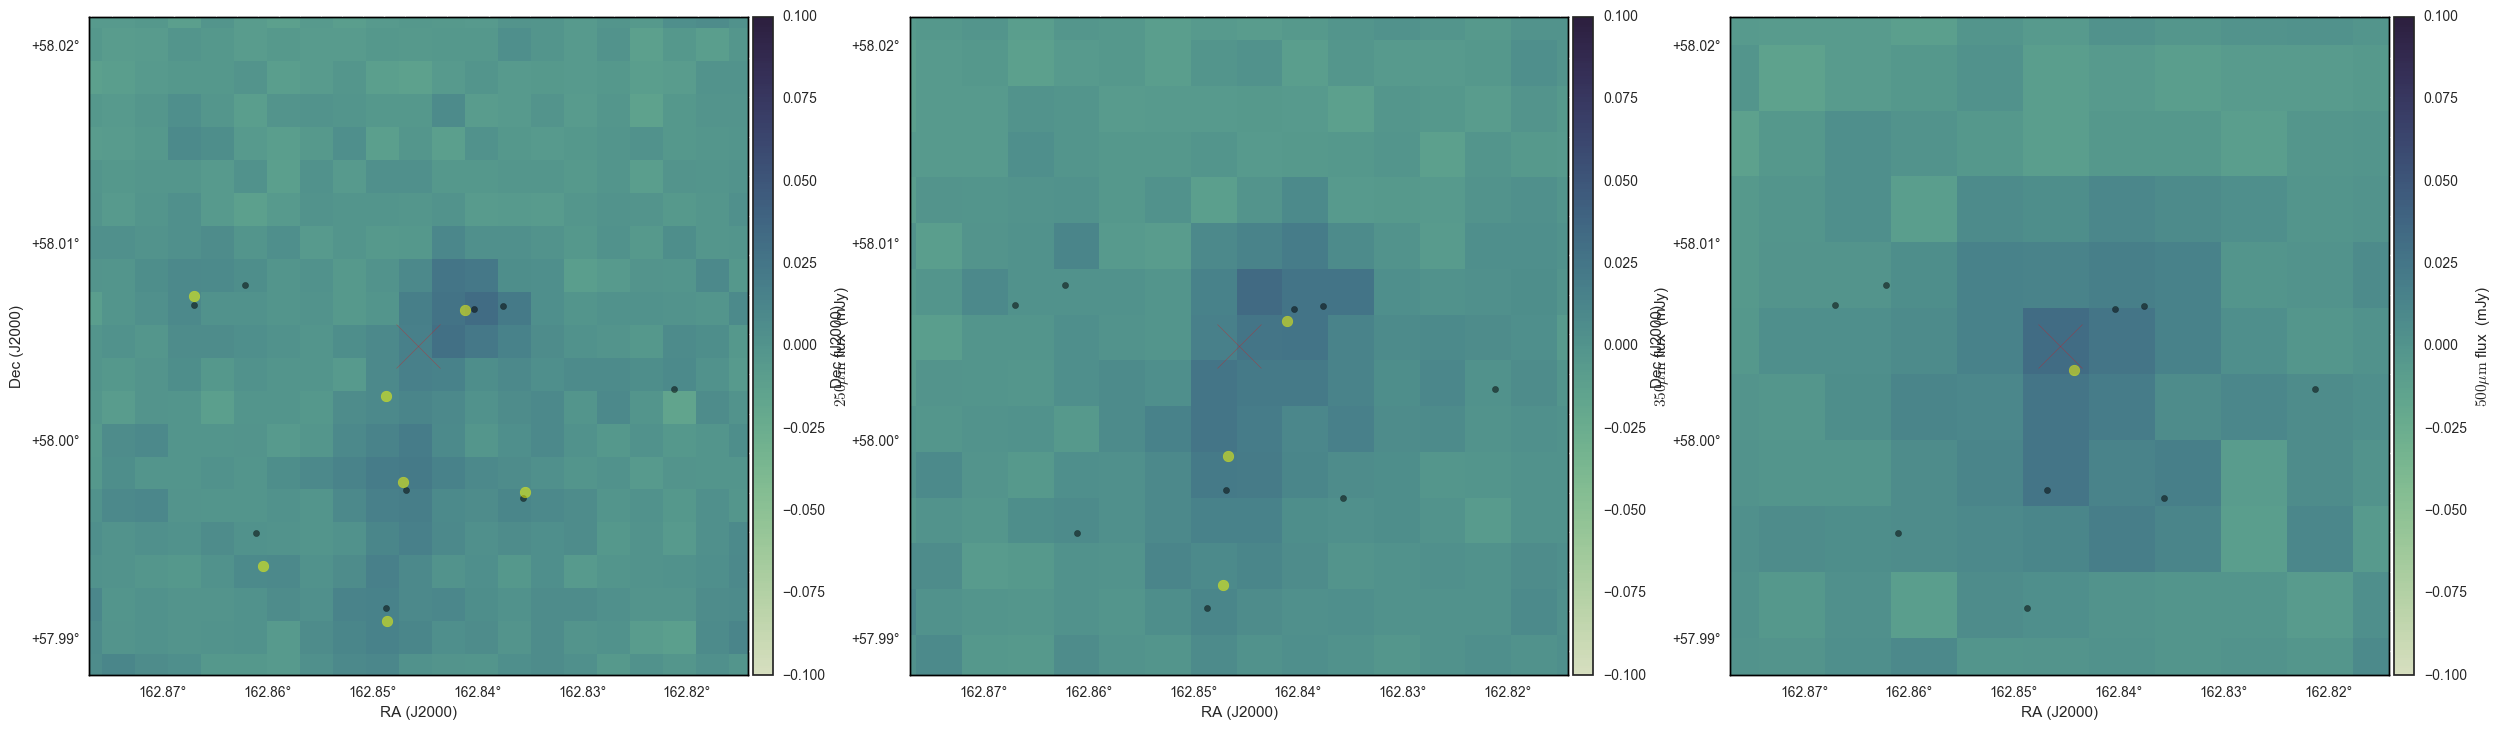

In [19]:
import aplpy
sns.set_style("white")

fig = plt.figure(figsize=(30,10))
real_250 = aplpy.FITSFigure(hdulist_250[1],figure=fig,subplot=(1,3,1))
real_250.show_colorscale(vmin=vmin,vmax=vmax,cmap=cmap)
real_250.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=20, alpha=0.5)
real_250.tick_labels.set_xformat('dd.dd')
real_250.tick_labels.set_yformat('dd.dd')
real_250.show_markers(RA,Dec, edgecolor='red', facecolor='red',
    marker='x', s=1000, alpha=0.5)
real_250.show_markers(scat250['RA'],scat250['Dec'], edgecolor='yellow', facecolor='yellow',
    marker='o', s=60, alpha=0.5)

real_350 = aplpy.FITSFigure(hdulist_350[1],figure=fig,subplot=(1,3,2))
real_350.show_colorscale(vmin=vmin,vmax=vmax,cmap=cmap)
real_350.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=20, alpha=0.5)
real_350.show_markers(RA,Dec, edgecolor='red', facecolor='red',
    marker='x', s=1000, alpha=0.5)
real_350.show_markers(scat350['RA'],scat350['Dec'], edgecolor='yellow', facecolor='yellow',
    marker='o', s=60, alpha=0.5)


real_350.tick_labels.set_xformat('dd.dd')
real_350.tick_labels.set_yformat('dd.dd')
real_500 = aplpy.FITSFigure(hdulist_500[1],figure=fig,subplot=(1,3,3))
real_500.show_colorscale(vmin=vmin,vmax=vmax,cmap=cmap)
real_500.show_markers(xid24['RA'], xid24['Dec'], edgecolor='black', facecolor='black',
                marker='o', s=20, alpha=0.5)
real_500.show_markers(RA,Dec, edgecolor='red', facecolor='red',
    marker='x', s=1000, alpha=0.5)
real_500.show_markers(scat500['RA'],scat500['Dec'], edgecolor='yellow', facecolor='yellow',
    marker='o', s=60, alpha=0.5)


real_500.tick_labels.set_xformat('dd.dd')
real_500.tick_labels.set_yformat('dd.dd')
real_250.add_colorbar(axis_label_text=r'$250\mathrm{\mu m}$ flux  (mJy)')  
real_350.add_colorbar(axis_label_text=r'$350\mathrm{\mu m}$ flux  (mJy)')  
real_500.add_colorbar(axis_label_text=r'$500\mathrm{\mu m}$ flux  (mJy)')  
real_250.recenter(RA, Dec, radius=radius)
real_350.recenter(RA, Dec, radius=radius)
real_500.recenter(RA, Dec, radius=radius)

In [20]:
ysb=Table.read('./fromPaper.txt', format='ascii')

In [21]:
ysb

RA,dec,i,S24,S250,S350,S500,zphot,type,2,nbands,zsubm,zcomb,sfr
float64,float64,float64,float64,float64,float64,float64,float64,str3,float64,int64,float64,float64,float64
159.03456,58.44533,21.37,1127.8,131.6,84.2,42.2,1.44,Scd,4.8,4,1.16,1.19,3.79
162.26817,58.46461,22.33,504.1,85.4,78.7,62.8,3.15,Sbc,5.0,6,3.16,3.17,3.87
160.33716,59.40493,22.36,1225.7,0.0,36.8,39.0,3.29,Scd,6.7,6,4.93,3.27,3.72
160.50839,58.67179,23.49,904.6,95.7,79.5,60.5,3.81,Sab,4.1,6,2.86,3.07,4.0
36.59817,-4.56164,25.11,389.5,59.3,67.2,54.7,3.88,Sab,2.1,5,3.53,3.68,3.83
36.10986,-4.45889,24.59,828.6,88.4,89.5,67.0,3.92,Sab,2.0,5,3.14,3.27,4.2
161.98271,58.07477,22.1,264.4,44.2,45.3,33.6,4.13,sb,25.4,6,3.15,3.68,3.76


KeyError: 'F_SPIRE_250'

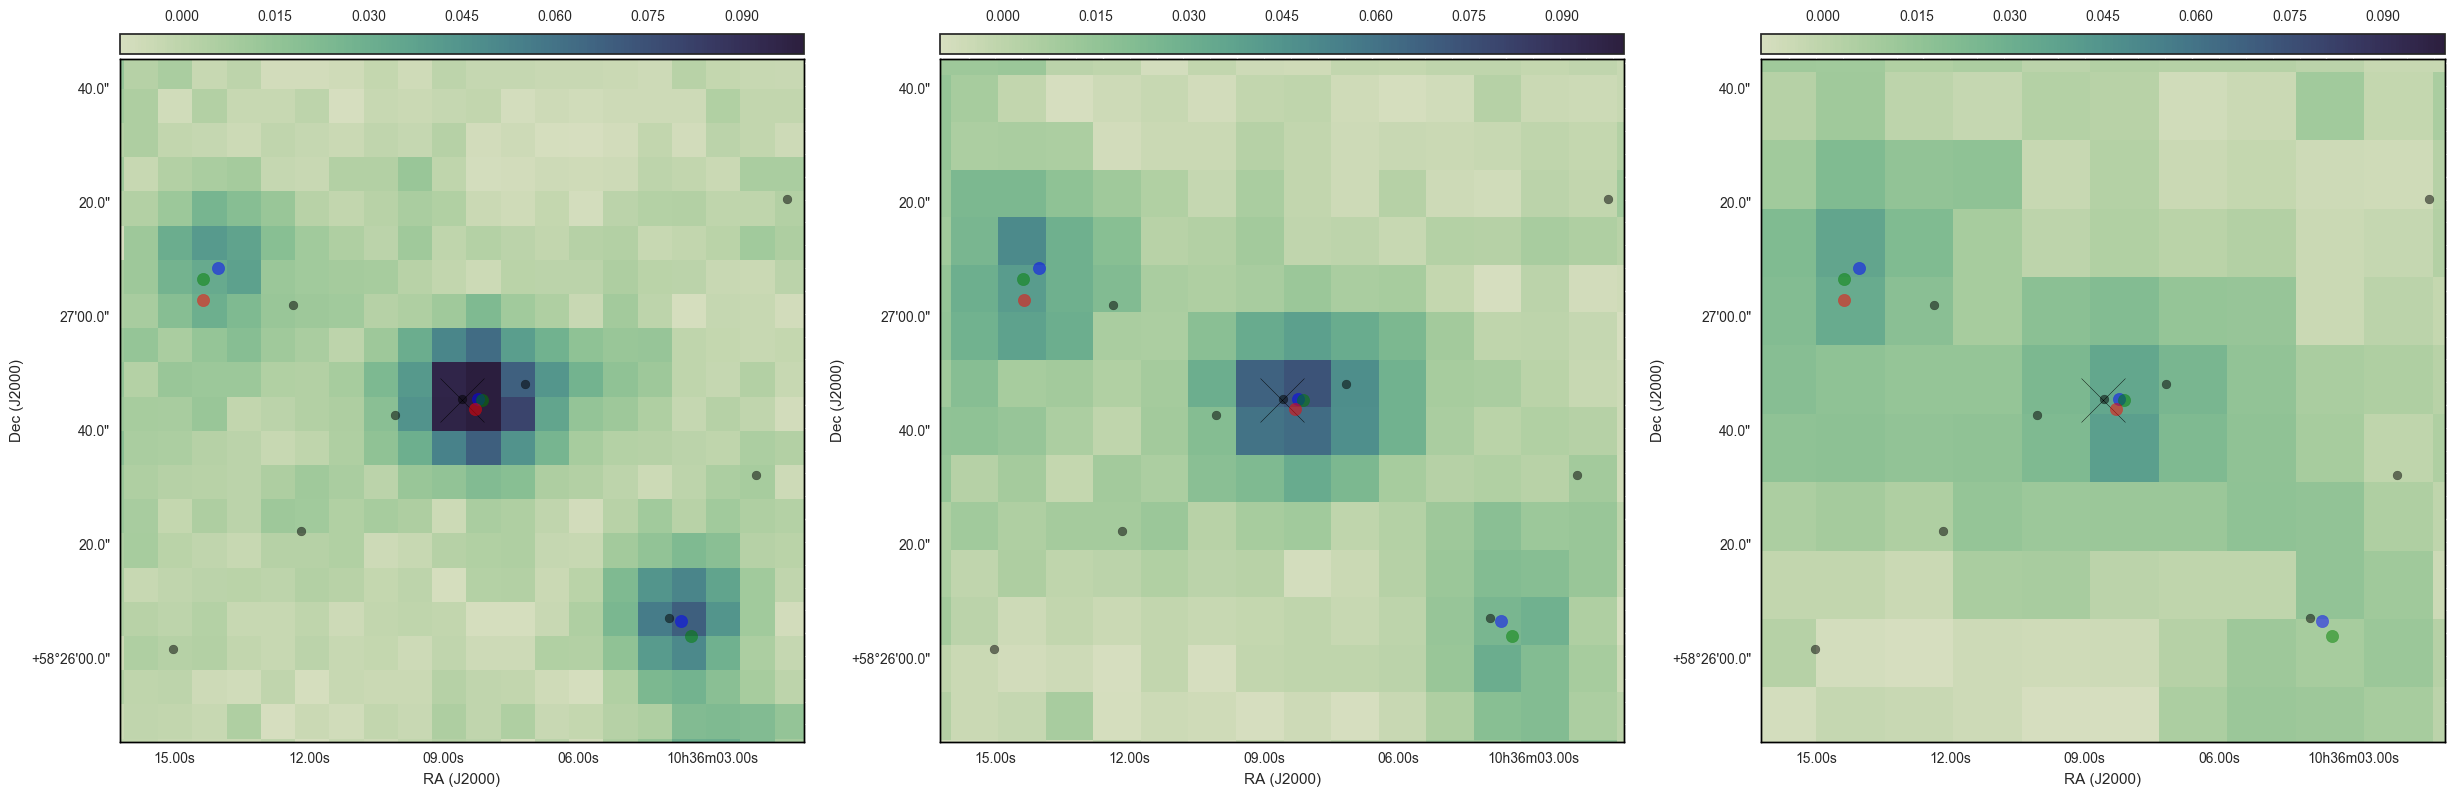

In [22]:
for i in range(0,7):
    MRR_sample(ysb['RA'][i],ysb['dec'][i],1/60.0)
    print ysb[i]

In [47]:
hstack([xid24['F_MIPS_24'][0],scat250[0]])

TypeError: `tables` arg must be a Table or sequence of Tables or Rows

In [62]:
import numpy as np
xid24['F_MIPS_24'][np.array([0])]._data

array([ 231.26])

In [32]:
xid24

xID24_ID,RA,Dec,F_MIPS_24,FErr_MIPS_24,F_SPIRE_250,FErr_SPIRE_250,FErrTot_SPIRE_250,Chi2_SPIRE_250,F_SPIRE_350,FErr_SPIRE_350,FErrTot_SPIRE_350,Chi2_SPIRE_350,F_SPIRE_500,FErr_SPIRE_500,FErrTot_SPIRE_500,Chi2_SPIRE_500,index_spitzer,gID,gSize,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500
,deg,deg,uJy,uJy,mJy,mJy,mJy,,mJy,mJy,mJy,,mJy,mJy,mJy,,,,,mJy/Beam,mJy/Beam,mJy/Beam
str50,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str100,int32,int32,float64,float64,float64
HerMES-xID24-302690,157.885318,57.793718,231.26,13.89,4.2406306,0.60973954,6.0657015,3.1331046,3.8504803,0.6550535,6.0200496,5.2521863,5.9833813,0.7202375,6.2166586,7.7964964,619705,181698,3,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302691,157.893388,57.776968,495.24,15.46,5.1345696,0.57651675,6.0620084,2.9956589,9.226455,0.8655568,6.029236,5.43262,9.430833,0.6699519,6.2035007,7.9821973,619453,180480,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302692,157.895148,57.819108,210.49,14.85,4.2313604,0.5947147,6.0613084,3.4422586,6.0626884,0.60219103,6.0138865,5.615175,8.033914,0.6592564,6.196878,6.1597667,620270,184922,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302693,157.897408,57.791878,450.92,15.58,5.4379506,0.798909,6.078466,2.043709,4.1345587,0.62400246,6.015002,3.907249,5.022814,0.9073341,6.232277,5.181458,619768,181698,3,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302694,157.907547,57.845058,204.57,15.82,4.7356744,0.6159273,6.067737,3.1597278,6.0880857,0.5886564,6.0087414,4.567341,9.006512,0.66069174,6.2090898,5.9918795,621016,186777,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302695,157.914937,57.838698,218.34,15.22,4.8221145,0.63369954,6.069407,2.115149,6.0097904,0.6060749,6.0147977,3.510213,7.360785,0.6100244,6.1992908,4.4073153,620929,187093,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302696,157.919208,57.712788,279.44,16.67,6.694285,0.68632466,6.0508504,3.4474454,8.279532,0.63717496,6.0119076,5.9944797,7.4012,0.5155375,6.1917443,6.973388,463098,174126,1,-2.3633409,-3.4109612,-3.8947144
HerMES-xID24-302697,157.919377,57.894338,1058.23,16.06,4.892702,0.5222408,6.066267,3.004969,6.708245,0.63620085,6.013464,5.2200303,7.2231283,0.6140477,6.197945,6.462931,622539,191798,1,-2.3633409,-3.4109612,-3.8947144


[<Row index=0 masked=True>
       xID24_ID          RA        Dec    F_MIPS_24 FErr_MIPS_24 F_SPIRE_250 FErr_SPIRE_250 FErrTot_SPIRE_250 Chi2_SPIRE_250 F_SPIRE_350 FErr_SPIRE_350 FErrTot_SPIRE_350 Chi2_SPIRE_350 F_SPIRE_500 FErr_SPIRE_500 FErrTot_SPIRE_500 Chi2_SPIRE_500 index_spitzer  gID   gSize Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500
                        deg        deg       uJy        uJy          mJy          mJy              mJy                           mJy          mJy              mJy                           mJy          mJy              mJy                                                     mJy/Beam      mJy/Beam      mJy/Beam  
        str50         float64    float64   float64    float64      float64      float64          float64         float64       float64      float64          float64         float64       float64      float64          float64         float64         str100    int32  int32    float64       float64       float64   
 ------------------- ----------

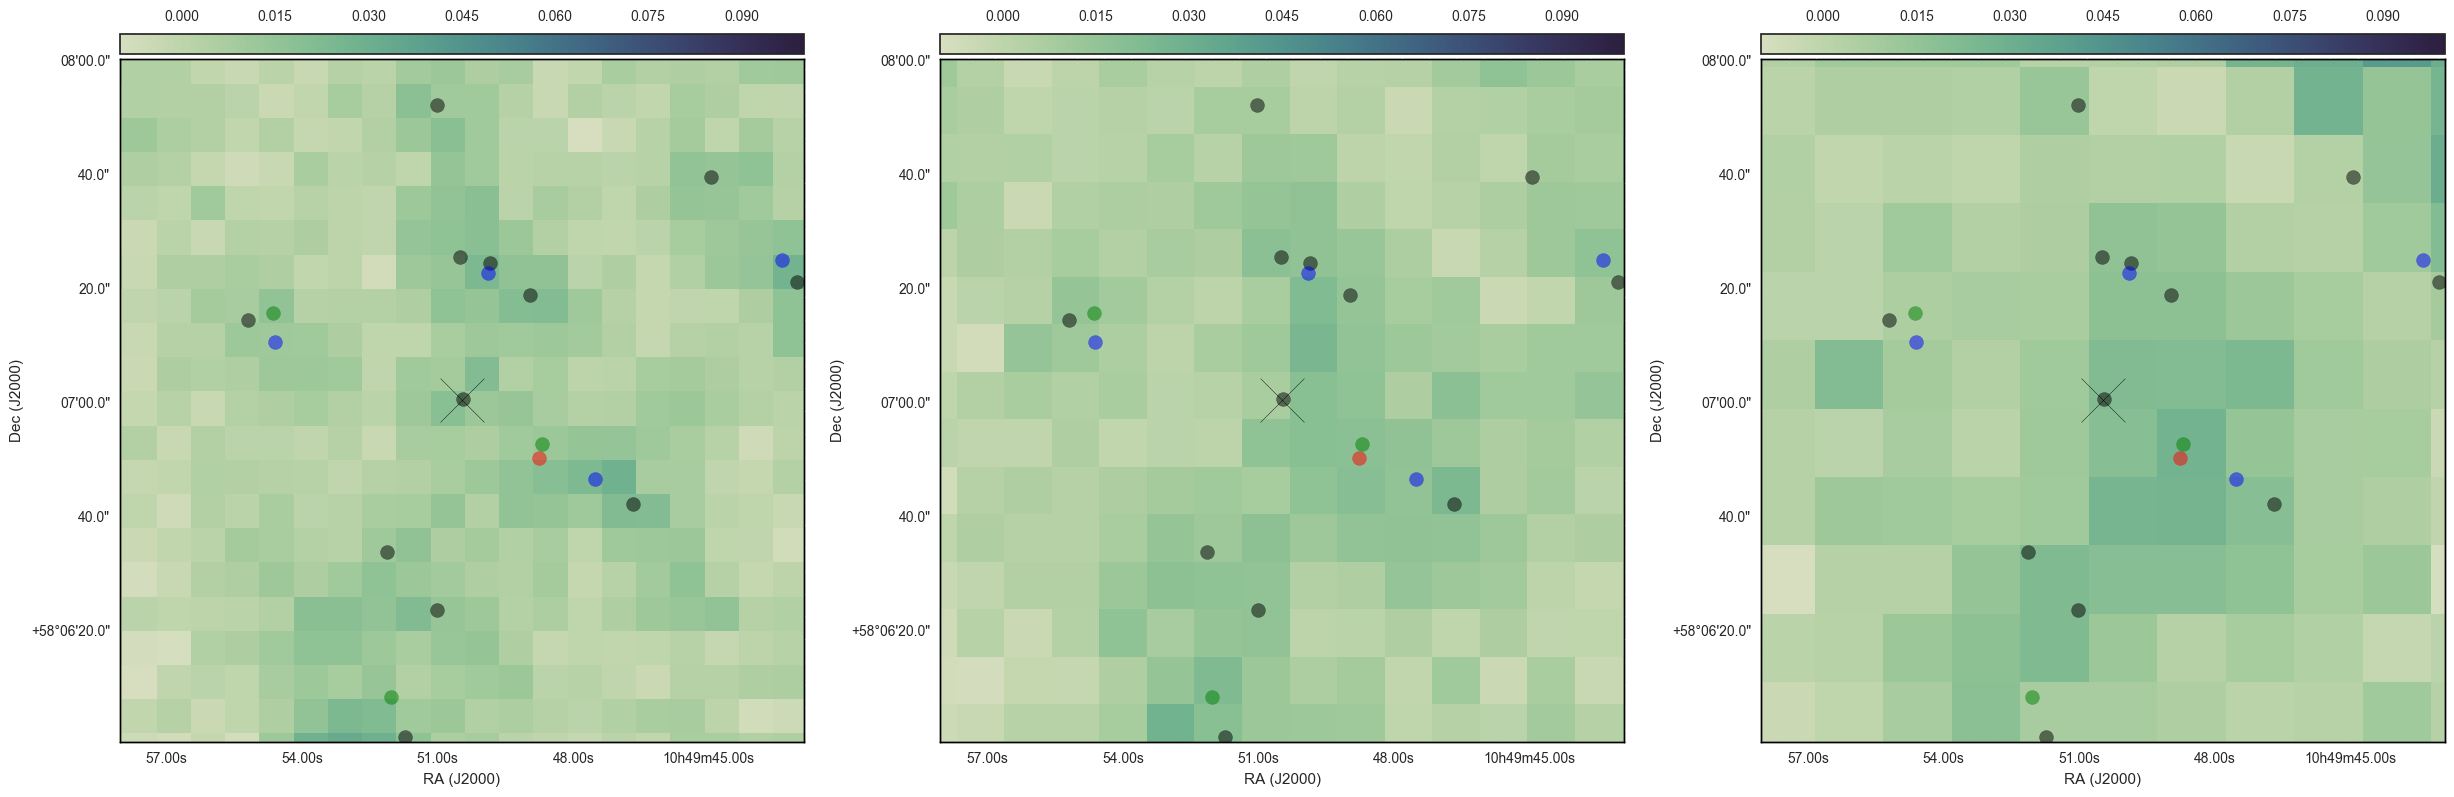

In [38]:
%run ./Source_investigation.ipynb

164.03789
164.02647
164.07881
164.06328
164.16988
164.36494
163.97462
164.42834
164.39459
164.04155
164.4798
